In [144]:
import os, pandas as pd, numpy as np

In [145]:
os.chdir("D:\CHRIST\Boot camp\DATA")

In [146]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [147]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [148]:
JRKD = df[df['state_1']=="JRKD"]

In [149]:
JRKD.isnull().sum().sort_values(ascending = False)

soyabean_v             2740
soyabean_q             2740
Land_Leased_out        2668
Otherwise_possessed    2605
Land_Leased_in         2352
                       ... 
palak_q                   0
carrot_q                  0
radish_q                  0
brinjal_q                 0
fv_tot                    0
Length: 384, dtype: int64

In [150]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [151]:
JRKD_new = JRKD[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [152]:
JRKD_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       6
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
dtype: int64

In [153]:
JRKD_clean = JRKD_new.copy()

In [154]:
JRKD_clean.loc[:, 'Meals_At_Home'] = JRKD_clean['Meals_At_Home'].fillna(JRKD_new['Meals_At_Home'].mean())

In [155]:
JRKD_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [156]:
# Outlier Checking

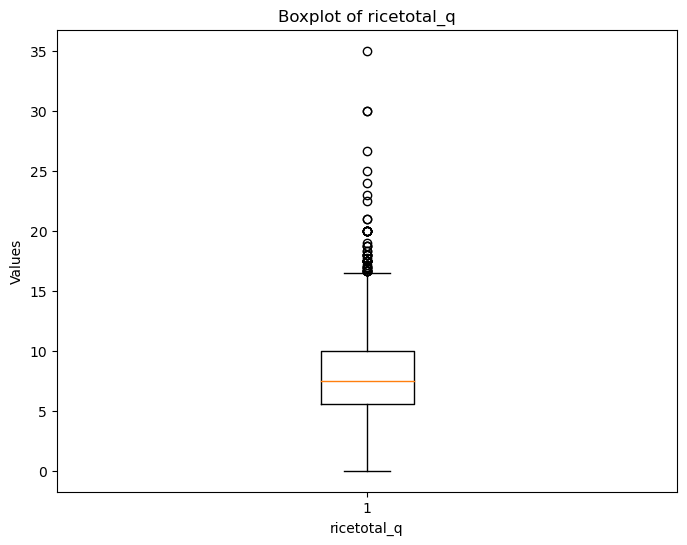

In [157]:
import matplotlib.pyplot as plt
# Assuming JRKD_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(JRKD_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [158]:
rice1 = JRKD_clean['ricetotal_q'].quantile(0.25)
rice2 = JRKD_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [159]:
JRKD_clean=JRKD_new[(JRKD_new['ricetotal_q']<=up_limit)&(JRKD_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x24102cb0710>,
 'caps': [<matplotlib.lines.Line2D at 0x24102ca2bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24102cb3510>],
 'medians': [<matplotlib.lines.Line2D at 0x24102ca21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24102ca13d0>],
 'means': []}

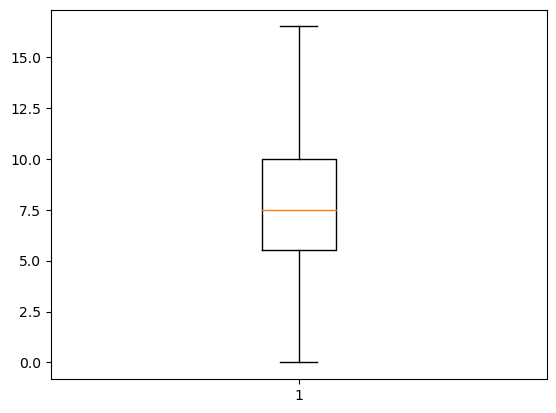

In [160]:
plt.boxplot(JRKD_clean['ricetotal_q'])

In [161]:
JRKD_clean['District'].unique()

array([21, 22, 20, 19, 18, 14, 17, 16, 15, 13,  4,  1,  3,  2,  5, 11, 12,
       10,  9,  8,  6,  7], dtype=int64)

In [162]:
# Replace values in the 'Sector' column
JRKD_clean.loc[:,'Sector'] = JRKD_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [163]:
#total consumption

In [164]:
JRKD_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [167]:
JRKD_clean.loc[:, 'total_consumption'] = JRKD_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [168]:
JRKD_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
3064,JRKD,21,RURAL,2,202,5.000000,6.666667,0.0,0,0.333333,0.083333,19.917003,26.666667,60.0,58.667003
3065,JRKD,21,RURAL,2,202,5.714286,4.285714,0.0,0,0.000000,0.142857,17.031529,16.428571,60.0,43.602957
3066,JRKD,21,RURAL,2,202,7.500000,5.000000,0.0,0,0.125000,0.000000,17.692599,14.375000,60.0,44.692599
3067,JRKD,21,RURAL,2,202,8.333333,5.000000,0.0,0,0.166667,0.000000,19.973400,18.333333,60.0,51.806733
3068,JRKD,21,RURAL,2,202,6.000000,6.000000,0.0,0,0.200000,0.000000,20.940140,20.000000,52.0,53.140140


In [169]:
JRKD_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              33.445038  51.807622  390.795535  0.0
2              24.361016  51.675159  280.168050  0.0

In [170]:
JRKD_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                28.727072  48.802803  198.651142  18.620290
2                33.281499  51.306682  286.690120  10.000000
3                21.055905  48.735207  162.050325  28.692870
4                23.564184  54.268044  204.350800   0.000000
5                34.818774  53.276464  280.168050  16.537584
6                12.214576  44.392934   87.450360  21.080095
7                27.864499  54.004056  278.300550  21.100105
8                20.891148  49.620381  122.206221   0.000000
9                24.416653  46.536590  169.865067  19.539181
10               21.533256  52.318334  144.581175  22.744475
11               24.011256  52.473324  213.401265   4.000000
12               26.627532  54.287327  195.400700   0.000000
13               24.167086  52.073108  242.909053  25.590274
14               45.017981  61.293347  390.795535   0.000000
15               30.698528  53.675668  162.073567   0.000000
16               29.673289  50.664734  153.710555   0.000000
17               18.682196  40.703784  109.983584  15.300260
18               42.155605  58.022627  324.026145   8.000000
19               26.797701  50.467727  131.700340   0.000000
20               27.187902  48.753382  190.250503   0.000000
21               24.180364  55.717896  143.210206  18.610098
22               20.068804  45.053175  133.631925  17.166808

In [171]:
total_consumption_by_districtcode=JRKD_clean.groupby('District')['total_consumption'].sum()

In [172]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
14    11400.562597
12    10368.879453
13     9529.378766
Name: total_consumption, dtype: float64

In [173]:
JRKD_clean.loc[:,"District"] = JRKD_clean.loc[:,"District"].replace({14: "Ranchi", 12: "Dhanbad", 13: "Bokaro"})

In [174]:
total_consumption_by_districtname=JRKD_clean.groupby('District')['total_consumption'].sum()

In [175]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Ranchi     11400.562597
Dhanbad    10368.879453
Bokaro      9529.378766
Name: total_consumption, dtype: float64

In [176]:
from statsmodels.stats import weightstats as stests

In [177]:
rural=JRKD_clean[JRKD_clean['Sector']=="RURAL"]
urban=JRKD_clean[JRKD_clean['Sector']=="URBAN"]

In [178]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
3064,JRKD,21,RURAL,2,202,5.000000,6.666667,0.0,0,0.333333,0.083333,19.917003,26.666667,60.0,58.667003
3065,JRKD,21,RURAL,2,202,5.714286,4.285714,0.0,0,0.000000,0.142857,17.031529,16.428571,60.0,43.602957
3066,JRKD,21,RURAL,2,202,7.500000,5.000000,0.0,0,0.125000,0.000000,17.692599,14.375000,60.0,44.692599
3067,JRKD,21,RURAL,2,202,8.333333,5.000000,0.0,0,0.166667,0.000000,19.973400,18.333333,60.0,51.806733
3068,JRKD,21,RURAL,2,202,6.000000,6.000000,0.0,0,0.200000,0.000000,20.940140,20.000000,52.0,53.140140


In [179]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
52218,JRKD,Dhanbad,URBAN,2,202,4.3125,5.750000,0.125000,0,0.000000,0.350000,39.175472,42.760500,60.0,92.473472
52219,JRKD,Dhanbad,URBAN,2,202,4.8600,5.600000,0.100000,0,0.360000,0.140000,38.535566,39.203600,60.0,88.799166
52220,JRKD,Dhanbad,URBAN,2,202,5.0000,7.000000,0.100000,0,0.300000,0.000000,38.375431,9.000000,60.0,59.775431
52221,JRKD,Dhanbad,URBAN,2,202,4.0000,6.333333,0.083333,0,0.266667,0.116667,34.583670,8.666667,60.0,54.050337
52222,JRKD,Dhanbad,URBAN,2,202,4.0000,5.000000,0.150000,0,0.000000,0.350000,58.655352,75.016000,58.0,143.171352


In [180]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [143]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 12.575119316631836
P-Value: 2.893630959311179e-36
